## Step 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], 1)

/Users/daniellesilvaggio/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
type_counts = application_df.APPLICATION_TYPE.value_counts() 
type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

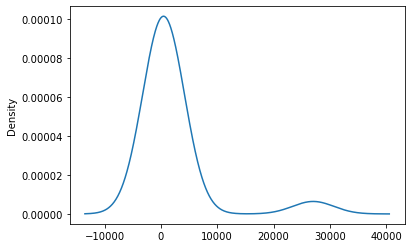

In [5]:
# Visualize the value counts of APPLICATION_TYPE
type_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(type_counts[type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

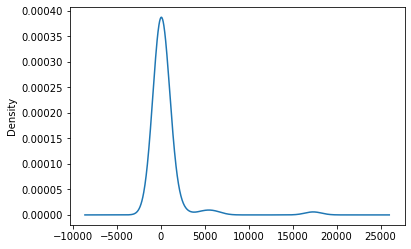

In [8]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/daniellesilvaggio/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

/Users/daniellesilvaggio/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/Users/daniellesilvaggio/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Attempt 1: Automated_NN_Optimizer  

In [14]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=100,
        step=2), activation=activation))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=100,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [15]:
# Import the kerastuner library
import kerastuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

/Users/daniellesilvaggio/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  
2022-07-05 14:35:41.544844: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 41s]
val_accuracy: 0.7266472578048706

Best val_accuracy So Far: 0.7292128205299377
Total elapsed time: 00h 16m 30s
INFO:tensorflow:Oracle triggered exit


In [17]:
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 97,
 'num_layers': 2,
 'units_0': 61,
 'units_1': 57,
 'units_2': 75,
 'units_3': 19,
 'units_4': 45,
 'units_5': 97,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0048'}

In [18]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5525 - accuracy: 0.7292 - 544ms/epoch - 2ms/step
Loss: 0.5525214672088623, Accuracy: 0.7292128205299377


## Attempt 2: Adding More Neurons to the Hidden Layers

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 120)               5280      
                                                                 
 dense_5 (Dense)             (None, 40)                4840      
                                                                 
 dense_6 (Dense)             (None, 1)                 41        
                                                                 
Total params: 10,161
Trainable params: 10,161
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

In [23]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 6:05 - loss: 318.4541 - accuracy: 0.5000
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 10/804 [..............................] - ETA: 4s - loss: 93062.5703 - accuracy: 0.4656
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 20/804 [..............................] - ETA: 4s - loss: 48050.9375 - accuracy: 0.4734
Epoch 1: saving model to checkpoints/weights.01.hdf5
 25/804 [..............................] - ETA: 5s - loss: 39783.0547 - accuracy: 0.4787
Epoch 1: saving model to checkpoints/weights.01.hdf5
 31/804 [>.............................] - ETA: 5s - loss: 33415.1055 - accuracy: 0.4788
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 40/804 [>.............................] - ETA: 5s - loss: 41595.5859 - accuracy: 0.4891
Epoch 1: saving model to ch

385/804 [=============>................] - ETA: 2s - loss: 81127.8828 - accuracy: 0.4880
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
395/804 [=============>................] - ETA: 2s - loss: 80980.2266 - accuracy: 0.4900
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
407/804 [==============>...............] - ETA: 2s - loss: 80985.1406 - accuracy: 0.4912
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 79860.0078 - accuracy: 0.4927
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
429/804 [===============>..............] - ETA: 2s - loss: 78424.1875 - accuracy: 0.4942
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving mod

  1/804 [..............................] - ETA: 17s - loss: 1489.1019 - accuracy: 0.4375
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 11/804 [..............................] - ETA: 4s - loss: 3773.8792 - accuracy: 0.4659 
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 21/804 [..............................] - ETA: 4s - loss: 3753.9114 - accuracy: 0.4688
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 32/804 [>.............................] - ETA: 3s - loss: 3836.0620 - accuracy: 0.4619
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 7169.8525 - accuracy: 0.4746
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 53/804 [>.............

431/804 [===============>..............] - ETA: 1s - loss: 94943.8984 - accuracy: 0.4954
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 113224.1250 - accuracy: 0.4961
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 110185.0469 - accuracy: 0.4970
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
466/804 [================>.............] - ETA: 1s - loss: 112761.7109 - accuracy: 0.4970
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
477/804 [================>.............] - ETA: 1s - loss: 111689.6250 - accuracy: 0.4979
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving


Epoch 3: saving model to checkpoints/weights.03.hdf5
 58/804 [=>............................] - ETA: 3s - loss: 245162.5312 - accuracy: 0.5199
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 70/804 [=>............................] - ETA: 3s - loss: 206628.7500 - accuracy: 0.5299
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 81/804 [==>...........................] - ETA: 3s - loss: 185106.5000 - accuracy: 0.5262
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 92/804 [==>...........................] - ETA: 3s - loss: 167022.3125 - accuracy: 0.5231
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
102/804 [==>...........................] - ETA: 3s - loss: 156359.9375 - accuracy: 0.5245
Epoch 3: savin

482/804 [================>.............] - ETA: 1s - loss: 69002.8828 - accuracy: 0.5027
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
492/804 [=================>............] - ETA: 1s - loss: 69345.2031 - accuracy: 0.5019
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
504/804 [=================>............] - ETA: 1s - loss: 68175.5781 - accuracy: 0.5012
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 70145.5156 - accuracy: 0.5009
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 68934.3359 - accuracy: 0.5002
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
536/804 [===========

 98/804 [==>...........................] - ETA: 3s - loss: 4775.3872 - accuracy: 0.4748
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
108/804 [===>..........................] - ETA: 3s - loss: 4372.0215 - accuracy: 0.4742
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
118/804 [===>..........................] - ETA: 3s - loss: 4048.8162 - accuracy: 0.4775
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
128/804 [===>..........................] - ETA: 3s - loss: 4279.7534 - accuracy: 0.4753
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
139/804 [====>.........................] - ETA: 3s - loss: 4032.1372 - accuracy: 0.4748
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
149/804 [====>...........

530/804 [==================>...........] - ETA: 1s - loss: 41871.4297 - accuracy: 0.5097
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 41315.1602 - accuracy: 0.5088
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 40814.3672 - accuracy: 0.5082
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 40039.0742 - accuracy: 0.5086
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 39622.9258 - accuracy: 0.5084
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving mod

150/804 [====>.........................] - ETA: 3s - loss: 32919.0898 - accuracy: 0.5017
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
160/804 [====>.........................] - ETA: 3s - loss: 31038.5723 - accuracy: 0.5027
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
170/804 [=====>........................] - ETA: 3s - loss: 29295.4355 - accuracy: 0.5031
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
181/804 [=====>........................] - ETA: 3s - loss: 27623.7129 - accuracy: 0.4995
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
192/804 [======>.......................] - ETA: 3s - loss: 26090.5488 - accuracy: 0.5023
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving mod

575/804 [====================>.........] - ETA: 1s - loss: 10267.5264 - accuracy: 0.5317
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 12695.3369 - accuracy: 0.5318
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 13026.6201 - accuracy: 0.5308
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 12975.8105 - accuracy: 0.5311
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 13000.7119 - accuracy: 0.5318
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
625/804 [===========

187/804 [=====>........................] - ETA: 3s - loss: 4493.4736 - accuracy: 0.5311
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
198/804 [======>.......................] - ETA: 3s - loss: 4345.3140 - accuracy: 0.5273
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
210/804 [======>.......................] - ETA: 3s - loss: 9188.1025 - accuracy: 0.5229
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 8795.4912 - accuracy: 0.5224
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
232/804 [=======>......................] - ETA: 3s - loss: 8374.4678 - accuracy: 0.5246
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to


Epoch 6: saving model to checkpoints/weights.06.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 16404.4297 - accuracy: 0.5048
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 16167.1680 - accuracy: 0.5047
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 15875.3652 - accuracy: 0.5049
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 15616.9492 - accuracy: 0.5057
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 15385.7520 - accuracy: 0.5053
Epoch 6: saving mod

231/804 [=======>......................] - ETA: 2s - loss: 25290.9883 - accuracy: 0.4900
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 24346.9805 - accuracy: 0.4900
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 24056.5078 - accuracy: 0.4885
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
262/804 [========>.....................] - ETA: 2s - loss: 23415.4512 - accuracy: 0.4876
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
273/804 [=========>....................] - ETA: 2s - loss: 22571.9375 - accuracy: 0.4881
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
284/804 [=========>.


Epoch 7: saving model to checkpoints/weights.07.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 12129.5508 - accuracy: 0.4897
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 11914.7305 - accuracy: 0.4897
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 11723.8184 - accuracy: 0.4907
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 11522.3291 - accuracy: 0.4917
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 11343.2070 - accuracy: 0.4932
Epoch 7: saving mod

281/804 [=========>....................] - ETA: 2s - loss: 9614.2090 - accuracy: 0.5206
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 9264.9463 - accuracy: 0.5193
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 8992.9814 - accuracy: 0.5170
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
312/804 [==========>...................] - ETA: 2s - loss: 8712.6172 - accuracy: 0.5171
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
322/804 [===========>..................] - ETA: 2s - loss: 8503.3213 - accuracy: 0.5149
Epoch 8: saving model to checkpoints/weights.08.hdf5
327/804 [===========>....

707/804 [=========================>....] - ETA: 0s - loss: 6956.8057 - accuracy: 0.4976
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 6869.3716 - accuracy: 0.4974
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 6773.2539 - accuracy: 0.4982
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 6672.7988 - accuracy: 0.4984
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 6567.3701 - accuracy: 0.4991
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to

323/804 [===========>..................] - ETA: 2s - loss: 1117.2158 - accuracy: 0.5245
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
333/804 [===========>..................] - ETA: 2s - loss: 1084.0338 - accuracy: 0.5243
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
344/804 [===========>..................] - ETA: 2s - loss: 1061.5278 - accuracy: 0.5234
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
355/804 [============>.................] - ETA: 2s - loss: 1046.4508 - accuracy: 0.5246
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
367/804 [============>.................] - ETA: 2s - loss: 2011.9250 - accuracy: 0.5227
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to

763/804 [===========================>..] - ETA: 0s - loss: 3452.9568 - accuracy: 0.5097
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 3739.8696 - accuracy: 0.5103
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
788/804 [============================>.] - ETA: 0s - loss: 3691.3806 - accuracy: 0.5095
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
800/804 [============================>.] - ETA: 0s - loss: 3637.4753 - accuracy: 0.5091
Epoch 9: saving model to checkpoints/weights.09.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 3620.0752 - accuracy: 0.5090
Epoch 10/100
  1/804 [..............................] - ETA: 5s - loss: 8.1226 - accuracy: 0.5625
Epoch 10: saving model to chec


Epoch 10: saving model to checkpoints/weights.10.hdf5
392/804 [=============>................] - ETA: 2s - loss: 3217.4563 - accuracy: 0.5079
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 3741.5452 - accuracy: 0.5085
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 3679.7217 - accuracy: 0.5088
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 3606.8633 - accuracy: 0.5094
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 3696.4351 - accuracy: 0.5091
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: savi

792/804 [============================>.] - ETA: 0s - loss: 2587.5298 - accuracy: 0.5126
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
801/804 [============================>.] - ETA: 0s - loss: 2558.7529 - accuracy: 0.5135
Epoch 10: saving model to checkpoints/weights.10.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 2549.6838 - accuracy: 0.5134
Epoch 11/100
  1/804 [..............................] - ETA: 3s - loss: 186.1225 - accuracy: 0.4688
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
 10/804 [..............................] - ETA: 4s - loss: 90.0982 - accuracy: 0.4812 
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
 20/804 [..............................] - ETA: 4s - loss: 117.2425 - accuracy: 0.4750
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model

395/804 [=============>................] - ETA: 2s - loss: 576.9589 - accuracy: 0.5109
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
405/804 [==============>...............] - ETA: 2s - loss: 565.5773 - accuracy: 0.5116
Epoch 11: saving model to checkpoints/weights.11.hdf5
410/804 [==============>...............] - ETA: 2s - loss: 558.7407 - accuracy: 0.5124
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
420/804 [==============>...............] - ETA: 2s - loss: 548.6437 - accuracy: 0.5118
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 536.0626 - accuracy: 0.5110
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 523.2516 - accur

  1/804 [..............................] - ETA: 15s - loss: 1.7798 - accuracy: 0.6250
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
 11/804 [..............................] - ETA: 4s - loss: 142.8343 - accuracy: 0.6051
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
 22/804 [..............................] - ETA: 3s - loss: 81.6422 - accuracy: 0.5966 
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
 32/804 [>.............................] - ETA: 3s - loss: 59.6035 - accuracy: 0.5645
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 55.0541 - accuracy: 0.5647
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
 52/804 [>.............


Epoch 12: saving model to checkpoints/weights.12.hdf5
426/804 [==============>...............] - ETA: 2s - loss: 265.3716 - accuracy: 0.5085
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 259.6162 - accuracy: 0.5087
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 254.2022 - accuracy: 0.5089
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
456/804 [================>.............] - ETA: 1s - loss: 248.6714 - accuracy: 0.5094
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
467/804 [================>.............] - ETA: 1s - loss: 243.0582 - accuracy: 0.5090
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving mo

 32/804 [>.............................] - ETA: 4s - loss: 19.1030 - accuracy: 0.4971
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
 42/804 [>.............................] - ETA: 4s - loss: 20.6328 - accuracy: 0.5015
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
 54/804 [=>............................] - ETA: 3s - loss: 23.8932 - accuracy: 0.5029
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
 62/804 [=>............................] - ETA: 3s - loss: 23.1784 - accuracy: 0.5055
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
 75/804 [=>............................] - ETA: 3s - loss: 22.0745 - accuracy: 0.5067
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
 84/804 [==>.............

462/804 [================>.............] - ETA: 1s - loss: 578.3901 - accuracy: 0.5191
Epoch 13: saving model to checkpoints/weights.13.hdf5
467/804 [================>.............] - ETA: 1s - loss: 572.2056 - accuracy: 0.5203
Epoch 13: saving model to checkpoints/weights.13.hdf5
472/804 [================>.............] - ETA: 1s - loss: 566.1523 - accuracy: 0.5205
Epoch 13: saving model to checkpoints/weights.13.hdf5
477/804 [================>.............] - ETA: 1s - loss: 560.2257 - accuracy: 0.5208
Epoch 13: saving model to checkpoints/weights.13.hdf5
482/804 [================>.............] - ETA: 1s - loss: 554.4239 - accuracy: 0.5206
Epoch 13: saving model to checkpoints/weights.13.hdf5
489/804 [=================>............] - ETA: 1s - loss: 546.4999 - accuracy: 0.5205
Epoch 13: saving model to checkpoints/weights.13.hdf5
493/804 [=================>............] - ETA: 1s - loss: 542.0728 - accuracy: 0.5208
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: sa

 53/804 [>.............................] - ETA: 5s - loss: 0.6301 - accuracy: 0.6392
Epoch 14: saving model to checkpoints/weights.14.hdf5
 59/804 [=>............................] - ETA: 5s - loss: 0.6315 - accuracy: 0.6340
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
 70/804 [=>............................] - ETA: 4s - loss: 0.6347 - accuracy: 0.6321
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
 78/804 [=>............................] - ETA: 4s - loss: 0.6349 - accuracy: 0.6310
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
 88/804 [==>...........................] - ETA: 4s - loss: 0.6335 - accuracy: 0.6339
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
101/804 [==>...........................] - ETA: 4s - loss: 0.6352 - accuracy: 0.6315


473/804 [================>.............] - ETA: 1s - loss: 0.6319 - accuracy: 0.6487
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.6323 - accuracy: 0.6480
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.6331 - accuracy: 0.6469
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.6335 - accuracy: 0.6464
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.6338 - accuracy: 0.6460
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
527/804 [==================>..

 91/804 [==>...........................] - ETA: 3s - loss: 0.6242 - accuracy: 0.6648
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
 99/804 [==>...........................] - ETA: 3s - loss: 0.6209 - accuracy: 0.6686
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
110/804 [===>..........................] - ETA: 3s - loss: 0.6225 - accuracy: 0.6656
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
120/804 [===>..........................] - ETA: 3s - loss: 0.6231 - accuracy: 0.6648
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
129/804 [===>..........................] - ETA: 3s - loss: 0.6246 - accuracy: 0.6642
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
140/804 [====>................

515/804 [==================>...........] - ETA: 1s - loss: 0.6293 - accuracy: 0.6536
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.6293 - accuracy: 0.6539
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.6288 - accuracy: 0.6547
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.6281 - accuracy: 0.6559
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.6283 - accuracy: 0.6552
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to che

130/804 [===>..........................] - ETA: 3s - loss: 0.6255 - accuracy: 0.6534
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
140/804 [====>.........................] - ETA: 3s - loss: 0.6262 - accuracy: 0.6545
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 0.6238 - accuracy: 0.6575
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
162/804 [=====>........................] - ETA: 3s - loss: 0.6255 - accuracy: 0.6557
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
173/804 [=====>........................] - ETA: 3s - loss: 0.6243 - accuracy: 0.6561
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
183/804 [=====>...............

557/804 [===================>..........] - ETA: 1s - loss: 0.6299 - accuracy: 0.6549
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.6297 - accuracy: 0.6555
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.6295 - accuracy: 0.6556
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.6302 - accuracy: 0.6546
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6299 - accuracy: 0.6550
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to che

180/804 [=====>........................] - ETA: 3s - loss: 0.6323 - accuracy: 0.6533
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.6318 - accuracy: 0.6531
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
202/804 [======>.......................] - ETA: 3s - loss: 0.6328 - accuracy: 0.6533
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
215/804 [=======>......................] - ETA: 3s - loss: 0.6313 - accuracy: 0.6564
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
226/804 [=======>......................] - ETA: 3s - loss: 0.6305 - accuracy: 0.6564
Epoch 17: saving model to che

601/804 [=====================>........] - ETA: 1s - loss: 0.6825 - accuracy: 0.5933
Epoch 17: saving model to checkpoints/weights.17.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.6826 - accuracy: 0.5929
Epoch 17: saving model to checkpoints/weights.17.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6827 - accuracy: 0.5924
Epoch 17: saving model to checkpoints/weights.17.hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.6828 - accuracy: 0.5917
Epoch 17: saving model to checkpoints/weights.17.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.6828 - accuracy: 0.5911
Epoch 17: saving model to checkpoints/weights.17.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6829 - accuracy: 0.5906
Epoch 17: saving model to checkpoints/weights.17.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6831 - accuracy: 0.5892
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to 

167/804 [=====>........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5372
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
177/804 [=====>........................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5385
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
189/804 [======>.......................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5379
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
202/804 [======>.......................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5405
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
217/804 [=======>......................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5400
Epoch 18: saving model to che

594/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5343
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5346
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to che

238/804 [=======>......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5331
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5303
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5321
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5321
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
298/

723/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
782/804 [============================>.] - ETA: 0s - loss: 

399/804 [=============>................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5303
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5302
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5310
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
459/


Epoch 21: saving model to checkpoints/weights.21.hdf5
 85/804 [==>...........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5320
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
100/804 [==>...........................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5369
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
115/804 [===>..........................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5410
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
130/804 [===>..........................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5399
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epo

570/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5303
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
630/


Epoch 22: saving model to checkpoints/weights.22.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5291
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5292
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5298
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5311
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epo

741/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 22: saving model to checkpoints/weights.22.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 22: saving model to che

417/804 [==============>...............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5354
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5344
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5353
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5345
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
477/

 88/804 [==>...........................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5334
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
103/804 [==>...........................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5391
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
118/804 [===>..........................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5400
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5416
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
148/

580/804 [====================>.........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5296
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5299
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5308
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5308
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
638/


Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5286
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5291
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
294/804 [=========>....................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5276
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5280
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epo

749/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
804/804 [==============================] - 3s 4ms/step - lo

425/804 [==============>...............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5293
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5299
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5299
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
485/

106/804 [==>...........................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5254
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5284
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5339
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
166/


Epoch 27: saving model to checkpoints/weights.27.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5296
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epo

207/804 [======>.......................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5305
Epoch 28: saving model to checkpoints/weights.28.hdf5
212/804 [======>.......................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5308
Epoch 28: saving model to checkpoints/weights.28.hdf5
217/804 [=======>......................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5300
Epoch 28: saving model to checkpoints/weights.28.hdf5
224/804 [=======>......................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5308
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
232/804 [=======>......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5310
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
242/804 [========>.....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5310
Epoch 28: saving model to checkpoints/weights.28.hdf5
247/804 [========>.....................] - ETA: 3s - los

612/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5320
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 28: saving model to checkpoints/weights.28.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5327
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329


238/804 [=======>......................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5357
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5352
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5357
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
281/804 [=========>....................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5351
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
293/804 [=========>....................] - ETA: 2s - loss: 


Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epo

404/804 [==============>...............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5334
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5342
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5348
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5359
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
464/


Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5344
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5315
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5286
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5255
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epo


Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5307
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5307
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5294
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5301
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epo


Epoch 32: saving model to checkpoints/weights.32.hdf5
261/804 [========>.....................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5332
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
276/804 [=========>....................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5332
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
291/804 [=========>....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5343
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5329
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epo


Epoch 32: saving model to checkpoints/weights.32.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5336
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 33/100
  1/804 [..............................] - ETA: 3s - loss: 0.6953 - accuracy: 0.5000
Epoch 33: s

432/804 [===============>..............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5355
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5352
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
492/


Epoch 34: saving model to checkpoints/weights.34.hdf5
118/804 [===>..........................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5336
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5322
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5334
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5326
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epo


Epoch 34: saving model to checkpoints/weights.34.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5291
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5292
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5296
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5295
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epo


Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5370
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5383
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5396
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5377
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epo

779/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 36/100
  1/804 [..............................] - ETA: 3s - loss: 0.6769 - accuracy: 0.6562
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5333
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: s


Epoch 36: saving model to checkpoints/weights.36.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5299
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epo


Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5370
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5378
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5403
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
191/804 [======>.......................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5402
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epo


Epoch 37: saving model to checkpoints/weights.37.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5335
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epo


Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5366
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5369
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5352
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5347
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epo

Epoch 39/100
  1/804 [..............................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5312
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5312
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5391
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5385
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights

488/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5338
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5342
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5345
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
548/


Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5309
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5284
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5310
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5290
Epoch 40: saving model to checkpoints/weights.40.hdf5
229/


Epoch 40: saving model to checkpoints/weights.40.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epo


Epoch 41: saving model to checkpoints/weights.41.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epo


Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5323
Epoch 42: saving model to checkpoints/weights.42.hdf5
 37/804 [>.............................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5355
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 51/804 [>.............................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5349
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 66/804 [=>............................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5393
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 81/

516/804 [==================>...........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5296
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5288
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5286
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5296
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
576/


Epoch 43: saving model to checkpoints/weights.43.hdf5
202/804 [======>.......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5323
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5338
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
247/804 [========>.....................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epo

687/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5304
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5296
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
747/


Epoch 44: saving model to checkpoints/weights.44.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5284
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5300
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5298
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5289
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epo


Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5302
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5346
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5291
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5243
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epo

539/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5310
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5304
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5298
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
599/


Epoch 46: saving model to checkpoints/weights.46.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5300
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5306
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5317
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
270/804 [=========>....................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5295
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epo


Epoch 46: saving model to checkpoints/weights.46.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5303
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5303
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5306
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5306
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epo


Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.6919 - accuracy: 0.5285
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.6919 - accuracy: 0.5285
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5289
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5287
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epo


Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5280
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5322
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5280
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5315
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epo

572/804 [====================>.........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5288
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5279
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5282
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.6917 - accuracy: 0.5284
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
632/

253/804 [========>.....................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5374
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5361
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5366
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5354
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
313/

728/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5312
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5316
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5316
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
788/


Epoch 50: saving model to checkpoints/weights.50.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epo

 90/804 [==>...........................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5399
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5408
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5357
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5375
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
150/

585/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
645/


Epoch 52: saving model to checkpoints/weights.52.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5346
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5305
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epo


Epoch 52: saving model to checkpoints/weights.52.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 53/100
  1/804 [..............................] - ETA: 3s - loss: 0.7007 - accuracy: 0.4688
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: s

437/804 [===============>..............] - ETA: 1s - loss: 0.6922 - accuracy: 0.5245
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.6921 - accuracy: 0.5253
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.6921 - accuracy: 0.5248
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.6920 - accuracy: 0.5260
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
497/

118/804 [===>..........................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5299
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5270
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5281
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5274
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
178/

613/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
673/

294/804 [=========>....................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5272
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5277
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5280
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5277
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
354/

789/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 56/100
  1/804 [..............................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5312
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.6898 - accuracy: 0.5479
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5396
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: s


Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5333
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5330
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epo

151/804 [====>.........................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5257
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5232
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5261
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5249
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
211/

646/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
706/

327/804 [===========>..................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5304
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5307
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5298
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5315
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
382/804 [=============>................] - ETA: 1s - loss: 


Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.6940 - accuracy: 0.5168
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.6933 - accuracy: 0.5201
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5356
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5350
Epoch 59: saving model to checkpoints/weights.59.hdf5
 67/

498/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
558/

179/804 [=====>........................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5367
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5416
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5410
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5400
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
239/

674/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
734/

355/804 [============>.................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5305
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5291
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5286
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5266
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
415/


Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.6928 - accuracy: 0.5238
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.6941 - accuracy: 0.5118
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.6937 - accuracy: 0.5140
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.6934 - accuracy: 0.5155
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epo


Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5342
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epo


Epoch 63: saving model to checkpoints/weights.63.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5321
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
247/804 [========>.....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5333
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
262/804 [========>.....................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5341
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
273/

702/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
762/

378/804 [=============>................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5277
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5278
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5283
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5281
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
438/

 59/804 [=>............................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5318
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5401
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5421
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 0.6891 - accuracy: 0.5460
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
119/


Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5338
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5341
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5342
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5336
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epo


Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5290
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5286
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5300
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5303
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epo


Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5323
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5322
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epo

406/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5339
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5344
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5345
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5338
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
466/

 87/804 [==>...........................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5298
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5306
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5334
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5336
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
147/

577/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 

253/804 [========>.....................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5306
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5323
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5307
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5312
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
313/

748/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5335
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5341
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5339
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5332
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
804/804 [==============================] - 3s 4ms/step - lo


Epoch 70: saving model to checkpoints/weights.70.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5322
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5327
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epo


Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5292
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5308
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5308
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5331
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epo


Epoch 71: saving model to checkpoints/weights.71.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epo

286/804 [=========>....................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5338
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5344
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5339
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5352
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
346/

781/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5314
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5314
Epoch 72: saving model to checkpoints/weights.72.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 73/100
  1/804 [..............................] - ETA: 3s - loss: 0.7131 - accuracy: 0.3750
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.6870 - accuracy: 0.5601
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
 27/804 [>..

457/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5334
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5333
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5327
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5329
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
517/


Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5232
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5291
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5325
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5301
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epo


Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5305
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5319
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epo

314/804 [==========>...................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5365
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5356
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5348
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5349
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
374/

Epoch 76/100
  1/804 [..............................] - ETA: 2s - loss: 0.6828 - accuracy: 0.5938
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.6887 - accuracy: 0.5500
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5375
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.6925 - accuracy: 0.5250
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights

495/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5302
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5303
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
555/


Epoch 77: saving model to checkpoints/weights.77.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5356
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5352
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5357
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5375
Epoch 77: saving model to checkpoints/weights.77.hdf5
234/804 [=======>......................] - ETA: 2s - loss: 

666/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
726/

342/804 [===========>..................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5255
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5252
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5250
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
384/804 [=============>................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5264
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
397/804 [=============>................] - ETA: 1s - loss: 


Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5257
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.6929 - accuracy: 0.5233
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.6931 - accuracy: 0.5199
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.6930 - accuracy: 0.5197
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epo


Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5311
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epo

194/804 [======>.......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5333
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5330
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5314
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
254/

689/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
749/


Epoch 81: saving model to checkpoints/weights.81.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5332
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epo


Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.6870 - accuracy: 0.5574
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.6882 - accuracy: 0.5514
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.6888 - accuracy: 0.5481
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.6896 - accuracy: 0.5430
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epo


Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5299
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5297
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5310
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5307
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epo

227/804 [=======>......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5334
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5340
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
272/804 [=========>....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5344
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
287/

722/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
782/

403/804 [==============>...............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5298
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5286
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5288
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5290
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
463/


Epoch 85: saving model to checkpoints/weights.85.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5421
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5409
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5394
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5399
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epo

579/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5339
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5340
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
639/


Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5340
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5338
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5342
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5336
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epo

755/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5312
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 87/100

Epoch 87: saving model to checkpoints/weights.87.hdf5
  1/804 [..............................] - ETA: 10s - loss: 0.6816 - accuracy: 0.5938
Epoch 87: 

436/804 [===============>..............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5300
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5302
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5305
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5298
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
496/

112/804 [===>..........................] - ETA: 2s - loss: 0.6931 - accuracy: 0.5167
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
127/804 [===>..........................] - ETA: 2s - loss: 0.6929 - accuracy: 0.5189
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 0.6928 - accuracy: 0.5198
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
157/804 [====>.........................] - ETA: 2s - loss: 0.6932 - accuracy: 0.5155
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
172/

607/804 [=====================>........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
667/


Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5322
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5330
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epo

783/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 89: saving model to checkpoints/weights.89.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 90/100
  1/804 [..............................] - ETA: 2s - loss: 0.6746 - accuracy: 0.7188
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5357
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
 29/804 [>..


Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5322
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5325
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5331
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5334
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epo


Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5312
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5314
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5330
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5349
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epo


Epoch 91: saving model to checkpoints/weights.91.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epo

316/804 [==========>...................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
376/

Epoch 93/100
  1/804 [..............................] - ETA: 3s - loss: 0.7046 - accuracy: 0.4062
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.6964 - accuracy: 0.4832
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.6940 - accuracy: 0.5069
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
 37/804 [>.............................] - ETA: 3s - loss: 0.6937 - accuracy: 0.5093
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
 52/804 [>.............................] - ETA

487/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
547/


Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5283
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5266
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5273
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5251
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epo


Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5303
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5303
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5308
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epo


Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5281
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
369/804 [============>.................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5293
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
384/804 [=============>................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5299
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5308
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epo

 30/804 [>.............................] - ETA: 2s - loss: 0.6895 - accuracy: 0.5437
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5389
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5307
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5317
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 90/

525/804 [==================>...........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
585/


Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5373
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5390
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5375
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5347
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epo


Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epo


Epoch 98: saving model to checkpoints/weights.98.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5353
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epo

 58/804 [=>............................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5404
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5347
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5394
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
103/804 [==>...........................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5419
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
118/

553/804 [===================>..........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
613/


Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5229
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5246
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5242
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5267
Epoch 100: saving model to checkpoin

709/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoin

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.9669 - accuracy: 0.6012 - 400ms/epoch - 1ms/step
Loss: 0.966862142086029, Accuracy: 0.6011661887168884


## Attempt 3: Add Additonal Hidden Layer

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 80)                3520      
                                                                 
 dense_8 (Dense)             (None, 30)                2430      
                                                                 
 dense_9 (Dense)             (None, 10)                310       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 6,271
Trainable params: 6,271
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

In [29]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 6:58 - loss: 6056.1196 - accuracy: 0.4688
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 10/804 [..............................] - ETA: 5s - loss: 2865.0308 - accuracy: 0.5281  
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 20/804 [..............................] - ETA: 4s - loss: 1479.3354 - accuracy: 0.5359
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 30/804 [>.............................] - ETA: 5s - loss: 986.4550 - accuracy: 0.5167 
Epoch 1: saving model to checkpoints/weights.01.hdf5
 37/804 [>.............................] - ETA: 5s - loss: 799.9757 - accuracy: 0.5144
Epoch 1: saving model to checkpoints/weights.01.hdf5
 43/804 [>.............................] - ETA: 5s - loss: 688.4481 - accuracy: 0.5087
Epoch 1: saving model to checkp

405/804 [==============>...............] - ETA: 2s - loss: 73.7140 - accuracy: 0.5029
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
420/804 [==============>...............] - ETA: 2s - loss: 71.1060 - accuracy: 0.5052
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
433/804 [===============>..............] - ETA: 2s - loss: 68.9920 - accuracy: 0.5052
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
440/804 [===============>..............] - ETA: 2s - loss: 67.9054 - accuracy: 0.5055
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
451/804 [===============>..............] - ETA: 2s - loss: 66.2661 - accuracy: 0.5060
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoin

 32/804 [>.............................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5283
Epoch 2: saving model to checkpoints/weights.02.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5206
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 46/804 [>.............................] - ETA: 4s - loss: 0.6926 - accuracy: 0.5170
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 56/804 [=>............................] - ETA: 4s - loss: 0.6930 - accuracy: 0.5123
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 70/804 [=>............................] - ETA: 4s - loss: 0.6930 - accuracy: 0.5129
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 81/804 [==>...........................]

456/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5326
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
466/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5331
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
476/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5334
Epoch 2: saving model to checkpoints/weights.02.hdf5
481/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5334
Epoch 2: saving model to checkpoints/weights.02.hdf5
486/804 [=================>............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5337
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
496/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5340
Epoch 2: saving model to checkpoints/weights.02.hdf5
504/804 [=


Epoch 3: saving model to checkpoints/weights.03.hdf5
 57/804 [=>............................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5351
Epoch 3: saving model to checkpoints/weights.03.hdf5
 65/804 [=>............................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5346
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 72/804 [=>............................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5378
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 82/804 [==>...........................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5412
Epoch 3: saving model to checkpoints/weights.03.hdf5
 91/804 [==>...........................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5412
Epoch 3: saving model to checkpoints/weights.03.hdf5
 95/804 [==>...........................] - ETA: 5s - loss: 0.6897 - accuracy: 0.5434
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: 

473/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
483/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5319
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5311
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/we

113/804 [===>..........................] - ETA: 3s - loss: 0.6928 - accuracy: 0.5191
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
123/804 [===>..........................] - ETA: 3s - loss: 0.6928 - accuracy: 0.5188
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
137/804 [====>.........................] - ETA: 3s - loss: 0.6930 - accuracy: 0.5167
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
148/804 [====>.........................] - ETA: 3s - loss: 0.6929 - accuracy: 0.5175
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.6929 - accuracy: 0.5175
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/we

543/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5305
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/we


Epoch 5: saving model to checkpoints/weights.05.hdf5
159/804 [====>.........................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5362
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
169/804 [=====>........................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5370
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
179/804 [=====>........................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5365
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
189/804 [======>.......................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5344
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
199/804 [======>.......................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5334
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/we

551/804 [===================>..........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5351
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5354
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5349
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5352
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.6907 - ac

207/804 [======>.......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5326
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
220/804 [=======>......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5320
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
235/804 [=======>......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
250/804 [========>.....................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5318
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 0.6910 - ac

689/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6911 - ac


Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
371/804 [============>.................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5349
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving

 37/804 [>.............................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5321
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
 52/804 [>.............................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5294
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
 66/804 [=>............................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5237
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
 77/804 [=>............................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5219
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
 92/804 [==>...........................] - ETA: 3s - loss: 0.6928 - ac

517/804 [==================>...........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5311
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5311
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.6912 - ac

193/804 [======>.......................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5283
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
218/804 [=======>......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5317
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
233/804 [=======>......................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5327
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
247/804 [========>.....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5338
Epoch 9: saving model to checkpoints/we

683/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
743/804 [=======


Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
364/804 [============>.................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5298
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5284
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5284
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epo

 30/804 [>.............................] - ETA: 3s - loss: 0.6881 - accuracy: 0.5542
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
 45/804 [>.............................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5368
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
 60/804 [=>............................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5302
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
 75/804 [=>............................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5254
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
 90/

515/804 [==================>...........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5350
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5355
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5352
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
565/804 [====================>.........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5356
Epoch 11: saving model to che

185/804 [=====>........................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5345
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5333
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5333
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5325
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 

666/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5310
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
726/


Epoch 13: saving model to checkpoints/weights.13.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5375
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
362/804 [============>.................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5376
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5361
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5361
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
402/


Epoch 14: saving model to checkpoints/weights.14.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.6942 - accuracy: 0.5058
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
 38/804 [>.............................] - ETA: 3s - loss: 0.6942 - accuracy: 0.5049
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
 53/804 [>.............................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5212
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
 66/804 [=>............................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5185
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
 78/

498/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5289
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5288
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 


Epoch 15: saving model to checkpoints/weights.15.hdf5
183/804 [=====>........................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5335
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5350
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5356
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5328
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epo

664/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 

330/804 [===========>..................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5366
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
341/804 [===========>..................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5349
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5359
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5366
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
385/804 [=============>................] - ETA: 1s - loss: 

  1/804 [..............................] - ETA: 13s - loss: 0.6872 - accuracy: 0.5625
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.6949 - accuracy: 0.5022 
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
 26/804 [..............................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5312
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
 39/804 [>.............................] - ETA: 3s - loss: 0.6891 - accuracy: 0.5481
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
 51/804 [>.............................] - ETA: 3s - loss: 0.6889 - accuracy: 0.5496
Epoch 17: saving model to c

481/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5356
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 

151/804 [====>.........................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5261
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5307
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5305
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
207/


Epoch 18: saving model to checkpoints/weights.18.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epo

312/804 [==========>...................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5381
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
323/804 [===========>..................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5381
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5359
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5368
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
368/

790/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 20/100
  1/804 [..............................] - ETA: 3s - loss: 0.7020 - accuracy: 0.4375
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5179
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.6894 - accuracy: 0.5474
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: s


Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epo


Epoch 21: saving model to checkpoints/weights.21.hdf5
139/804 [====>.........................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5360
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5356
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5337
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5318
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epo

620/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
680/

305/804 [==========>...................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5381
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
316/804 [==========>...................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5360
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5364
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5355
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
361/

785/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 22: saving model to checkpoints/weights.22.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 23/100
  1/804 [..............................] - ETA: 3s - loss: 0.6794 - accuracy: 0.6250
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
 12/804 [..............................] - ETA: 4s - loss: 0.6886 - accuracy: 0.5521
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
 27/804 [>..

442/804 [===============>..............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5260
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5261
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5271
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5289
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
502/

108/804 [===>..........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5298
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
118/804 [===>..........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5286
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5305
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
144/804 [====>.........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5289
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
158/804 [====>.........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5311
Epoch 24: saving model to che

593/804 [=====================>........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5291
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5295
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
653/

259/804 [========>.....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5340
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
274/804 [=========>....................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5348
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5358
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
299/804 [==========>...................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5361
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
314/804 [==========>...................] - ETA: 2s - loss: 


Epoch 25: saving model to checkpoints/weights.25.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epo


Epoch 26: saving model to checkpoints/weights.26.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epo

 86/804 [==>...........................] - ETA: 3s - loss: 0.6925 - accuracy: 0.5207
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
101/804 [==>...........................] - ETA: 2s - loss: 0.6926 - accuracy: 0.5198
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
116/804 [===>..........................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5216
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
131/804 [===>..........................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5248
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
146/


Epoch 27: saving model to checkpoints/weights.27.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5361
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5359
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5360
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.6906 - accuracy: 0.5358
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
636/

257/804 [========>.....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5327
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
272/804 [=========>....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5321
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5339
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
301/804 [==========>...................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
312/804 [==========>...................] - ETA: 2s - loss: 

746/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
804/

418/804 [==============>...............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5295
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5294
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5288
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
473/804 [================>.............] - ETA: 1s - loss: 

 88/804 [==>...........................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5327
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
 99/804 [==>...........................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
113/804 [===>..........................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5318
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
124/804 [===>..........................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5318
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
139/804 [====>.........................] - ETA: 2s - loss: 


Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epo


Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
225/804 [=======>......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5342
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
250/804 [========>.....................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5329
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
261/804 [========>.....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5339
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
272/804 [=========>....................] - ETA: 2s - loss: 

640/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 31: saving model to checkpoints/weights.31.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 31: saving model to checkpoints/weights.31.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 31: saving model to checkpoints/weights.31.hdf5



236/804 [=======>......................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5295
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
246/804 [========>.....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5281
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
256/804 [========>.....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5292
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
266/804 [========>.....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5291
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
276/804 [=========>....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5296
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
286/804 [=========>...........

656/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
706/804 [=====================


Epoch 33: saving model to checkpoints/weights.33.hdf5
267/804 [========>.....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5324
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
277/804 [=========>....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5318
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
287/804 [=========>....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5308
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
297/804 [==========>...................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5303
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
307/804 [==========>...................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to che

682/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
732/804 [=====================

293/804 [=========>....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5283
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
303/804 [==========>...................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5279
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5291
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
323/804 [===========>..................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5296
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
333/804 [===========>..................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5311
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
343/804 [===========>.........

713/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
763/804 [=====================

324/804 [===========>..................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
334/804 [===========>..................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
344/804 [===========>..................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5294
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
354/804 [============>.................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5293
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
364/804 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
374/804 [============>........

739/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
789/804 [=====================


Epoch 36: saving model to checkpoints/weights.36.hdf5
350/804 [============>.................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5290
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5290
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5286
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
380/804 [=============>................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5274
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5278
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to che

770/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 37/100

Epoch 37: saving model to checkpoints/weights.37.hdf5
  1/804 [..............................] - ETA: 20s - loss: 0.6954 - accuracy: 0.5000
Epoch 37: saving model to checkpoints/weights.37.hdf5
  7/804 [..............................] - ETA: 7s - loss: 0.6845 - accuracy: 0.5804 
Epoch 37: saving model to checkpoin

366/804 [============>.................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5284
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
376/804 [=============>................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5299
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
386/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5318
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
396/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5314
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
406/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5314
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
416/804 [==============>......

786/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 37: saving model to checkpoints/weights.37.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 38/100
  1/804 [..............................] - ETA: 5s - loss: 0.6827 - accuracy: 0.5938
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
  8/804 [..............................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5312
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.6874 - accuracy: 0.5588
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints

392/804 [=============>................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5285
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
402/804 [==============>...............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5273
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
412/804 [==============>...............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5284
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
422/804 [==============>...............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5288
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
432/804 [===============>..............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5278
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
442/804 [===============>.....

  1/804 [..............................] - ETA: 3s - loss: 0.6955 - accuracy: 0.5000
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
  8/804 [..............................] - ETA: 6s - loss: 0.6896 - accuracy: 0.5430
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
 18/804 [..............................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5347
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
 28/804 [>.............................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5379
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5387
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
 48/804 [>....................


Epoch 39: saving model to checkpoints/weights.39.hdf5
423/804 [==============>...............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5356
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
433/804 [===============>..............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5358
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5358
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
453/804 [===============>..............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5350
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5358
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to che

 29/804 [>.............................] - ETA: 4s - loss: 0.6894 - accuracy: 0.5463
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
 39/804 [>.............................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5425
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.6890 - accuracy: 0.5491
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.6895 - accuracy: 0.5450
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5353
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
 79/804 [=>...................


Epoch 40: saving model to checkpoints/weights.40.hdf5
454/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5299
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5302
Epoch 40: saving model to checkpoints/weights.40.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
499/804 [=================>...

 60/804 [=>............................] - ETA: 4s - loss: 0.6888 - accuracy: 0.5495
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
 70/804 [=>............................] - ETA: 4s - loss: 0.6894 - accuracy: 0.5451
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
 80/804 [=>............................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5398
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
 90/804 [==>...........................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5385
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
100/804 [==>...........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5344
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
110/804 [===>.................


Epoch 41: saving model to checkpoints/weights.41.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5304
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5304
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5298
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to che

 91/804 [==>...........................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5278
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
101/804 [==>...........................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5291
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
111/804 [===>..........................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5293
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
121/804 [===>..........................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5261
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
131/804 [===>..........................] - ETA: 4s - loss: 0.6926 - accuracy: 0.5208
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
141/804 [====>................


Epoch 42: saving model to checkpoints/weights.42.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5304
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to che

117/804 [===>..........................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5270
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
127/804 [===>..........................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5283
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
137/804 [====>.........................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5249
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
147/804 [====>.........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5276
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
157/804 [====>.........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5285
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
167/804 [=====>...............

517/804 [==================>...........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 43: saving model to checkpoints/weights.43.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 43: saving model to checkpoints/weights.43.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 43: saving model to checkpoints/weights.43.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 43: saving model to checkpoints/weights.43.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 43: saving model to checkpoints/weights.43.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 43: saving model to checkpoints/weights.43.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5311
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to 


Epoch 44: saving model to checkpoints/weights.44.hdf5
118/804 [===>..........................] - ETA: 4s - loss: 0.6896 - accuracy: 0.5434
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
128/804 [===>..........................] - ETA: 3s - loss: 0.6895 - accuracy: 0.5444
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
138/804 [====>.........................] - ETA: 3s - loss: 0.6895 - accuracy: 0.5442
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
148/804 [====>.........................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5412
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5384
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to che

533/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
583/804 [====================>

144/804 [====>.........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5317
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
154/804 [====>.........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5298
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
164/804 [=====>........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
174/804 [=====>........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5327
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
184/804 [=====>........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5302
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
194/804 [======>..............

564/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5306
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
614/804 [=====================


Epoch 46: saving model to checkpoints/weights.46.hdf5
180/804 [=====>........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
190/804 [======>.......................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5326
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
200/804 [======>.......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5327
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
210/804 [======>.......................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5351
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5358
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to che

600/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5327
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
650/804 [=====================

211/804 [======>.......................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5262
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
221/804 [=======>......................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5281
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
231/804 [=======>......................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5261
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
241/804 [=======>......................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5257
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
251/804 [========>.....................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5264
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
261/804 [========>............

631/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
681/804 [=====================

237/804 [=======>......................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5264
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
247/804 [========>.....................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5254
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
257/804 [========>.....................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5261
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
267/804 [========>.....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5283
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
278/804 [=========>....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5279
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
287/804 [=========>...........


Epoch 48: saving model to checkpoints/weights.48.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5298
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to che

263/804 [========>.....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5318
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
273/804 [=========>....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5319
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
283/804 [=========>....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5314
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
293/804 [=========>....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5323
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
303/804 [==========>...................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5320
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
313/804 [==========>..........


Epoch 49: saving model to checkpoints/weights.49.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5334
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to che

294/804 [=========>....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5324
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
304/804 [==========>...................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
314/804 [==========>...................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
324/804 [===========>..................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5296
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
334/804 [===========>..................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5289
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
344/804 [===========>.........

714/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5296
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
764/804 [=====================


Epoch 51: saving model to checkpoints/weights.51.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5334
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5327
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
350/804 [============>.................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5324
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5329
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5334
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to che


Epoch 51: saving model to checkpoints/weights.51.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to che

361/804 [============>.................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5287
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
371/804 [============>.................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5281
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5275
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5288
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5287
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
411/804 [==============>......


Epoch 52: saving model to checkpoints/weights.52.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 52: saving model to checkpoints/weights.52.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 53/100
  1/804 [..............................] - ETA: 4s - loss: 0.7115 - accuracy: 0.3750
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
  9/804 [..............................] - ETA: 4s - loss: 0.6930 - accuracy: 0.5174
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
 18/804 [..............................] - ETA: 4s - loss: 0.6945 - accuracy: 0.5052
Epoch 53: saving model to checkpoints

387/804 [=============>................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5294
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
397/804 [=============>................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5295
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
407/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
437/804 [===============>.....

  1/804 [..............................] - ETA: 2s - loss: 0.6791 - accuracy: 0.6250
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
  8/804 [..............................] - ETA: 6s - loss: 0.6892 - accuracy: 0.5469
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
 18/804 [..............................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5347
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
 28/804 [>.............................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5335
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5247
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
 48/804 [>....................


Epoch 54: saving model to checkpoints/weights.54.hdf5
423/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5322
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
433/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5329
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
453/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5326
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to che

 29/804 [>.............................] - ETA: 4s - loss: 0.6941 - accuracy: 0.5086
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
 39/804 [>.............................] - ETA: 4s - loss: 0.6927 - accuracy: 0.5200
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5261
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5286
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5217
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
 79/804 [=>...................


Epoch 55: saving model to checkpoints/weights.55.hdf5
454/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5305
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to che

 60/804 [=>............................] - ETA: 4s - loss: 0.6894 - accuracy: 0.5448
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
 70/804 [=>............................] - ETA: 4s - loss: 0.6881 - accuracy: 0.5540
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
 80/804 [=>............................] - ETA: 4s - loss: 0.6880 - accuracy: 0.5551
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
 90/804 [==>...........................] - ETA: 4s - loss: 0.6890 - accuracy: 0.5479
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
100/804 [==>...........................] - ETA: 4s - loss: 0.6889 - accuracy: 0.5484
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
110/804 [===>.................


Epoch 56: saving model to checkpoints/weights.56.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to che

 91/804 [==>...........................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5306
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
101/804 [==>...........................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5278
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5335
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5294
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5236
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
141/804 [====>................


Epoch 57: saving model to checkpoints/weights.57.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5285
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5284
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5287
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5286
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5286
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to che

122/804 [===>..........................] - ETA: 4s - loss: 0.6894 - accuracy: 0.5443
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
132/804 [===>..........................] - ETA: 3s - loss: 0.6897 - accuracy: 0.5421
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
142/804 [====>.........................] - ETA: 3s - loss: 0.6893 - accuracy: 0.5449
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
152/804 [====>.........................] - ETA: 3s - loss: 0.6896 - accuracy: 0.5430
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
162/804 [=====>........................] - ETA: 3s - loss: 0.6895 - accuracy: 0.5438
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
172/804 [=====>...............


Epoch 58: saving model to checkpoints/weights.58.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5348
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5351
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5341
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5332
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to che

148/804 [====>.........................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5215
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.6926 - accuracy: 0.5194
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 0.6926 - accuracy: 0.5197
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
178/804 [=====>........................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5214
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
188/804 [======>.......................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5223
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
198/804 [======>..............

568/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5295
Epoch 59: saving model to checkpoints/weights.59.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5295
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5302
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5304
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300


179/804 [=====>........................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5370
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5362
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
199/804 [======>.......................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5347
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
209/804 [======>.......................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5327
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5327
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
229/804 [=======>.............


Epoch 60: saving model to checkpoints/weights.60.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5311
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to che

210/804 [======>.......................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5397
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5398
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5375
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
240/804 [=======>......................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5359
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
250/804 [========>.....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5337
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
260/804 [========>............


Epoch 61: saving model to checkpoints/weights.61.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5303
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to che


Epoch 62: saving model to checkpoints/weights.62.hdf5
246/804 [========>.....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5324
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
256/804 [========>.....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5312
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
266/804 [========>.....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5320
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
276/804 [=========>....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5336
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
286/804 [=========>....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5328
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to che

661/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
711/804 [=====================

267/804 [========>.....................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5263
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
277/804 [=========>....................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5259
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
287/804 [=========>....................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5258
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
297/804 [==========>...................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5274
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
307/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5290
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
317/804 [==========>..........


Epoch 63: saving model to checkpoints/weights.63.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to che

298/804 [==========>...................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5322
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
308/804 [==========>...................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5324
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
318/804 [==========>...................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5333
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5334
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
348/804 [===========>.........

718/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5318
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
768/804 [=====================


Epoch 65: saving model to checkpoints/weights.65.hdf5
331/804 [===========>..................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5221
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5227
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5235
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5230
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5234
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to che

749/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5317
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5317
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5317
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to che


Epoch 66: saving model to checkpoints/weights.66.hdf5
365/804 [============>.................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5342
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
375/804 [============>.................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5341
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
385/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5343
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
395/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5342
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
405/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5340
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to che

780/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 67/100

Epoch 67: saving model to checkpoints/weights.67.hdf5
  1/804 [..............................] - ETA: 15s - loss: 0.7029 - accuracy: 0.4375
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5227 
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.6888

376/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5317
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
386/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
396/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
406/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
416/804 [==============>...............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5287
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
426/804 [==============>......


Epoch 67: saving model to checkpoints/weights.67.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 68/100
  1/804 [..............................] - ETA: 3s - loss: 0.6990 - accuracy: 0.4688
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5417
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5312
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
 27/804 [>.............................] - ETA: 4s - loss: 0.6898 - accuracy: 0.5428
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
 37/804 [>.............................] - ETA: 4s - loss: 0.6888 -

407/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5321
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5318
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5320
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
447/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5317
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
457/804 [================>....

 18/804 [..............................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5295
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
 28/804 [>.............................] - ETA: 5s - loss: 0.6941 - accuracy: 0.5078
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.6930 - accuracy: 0.5164
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
 48/804 [>.............................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5234
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
 58/804 [=>............................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5242
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
 68/804 [=>...................


Epoch 69: saving model to checkpoints/weights.69.hdf5
433/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5320
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5324
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
453/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5324
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to che

 39/804 [>.............................] - ETA: 4s - loss: 0.6929 - accuracy: 0.5176
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5293
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5334
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5281
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
 79/804 [=>............................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5301
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
 89/804 [==>..................

461/804 [================>.............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5277
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5281
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5292
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
509/804 [=================>...

 70/804 [=>............................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5321
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
 80/804 [=>............................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5340
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
 90/804 [==>...........................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5358
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
100/804 [==>...........................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5337
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
110/804 [===>..........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5330
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
120/804 [===>.................

490/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
540/804 [===================>.

101/804 [==>...........................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5402
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 0.6894 - accuracy: 0.5450
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 0.6893 - accuracy: 0.5455
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5415
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
141/804 [====>.........................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5417
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
151/804 [====>................


Epoch 72: saving model to checkpoints/weights.72.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5313
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to che


Epoch 73: saving model to checkpoints/weights.73.hdf5
137/804 [====>.........................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5322
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
147/804 [====>.........................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5332
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
157/804 [====>.........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5330
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
167/804 [=====>........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5316
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
177/804 [=====>........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5348
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to che

552/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5306
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
602/804 [=====================

163/804 [=====>........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5330
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
173/804 [=====>........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5332
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
183/804 [=====>........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5314
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
193/804 [======>.......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5330
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
203/804 [======>.......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5334
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
213/804 [======>..............


Epoch 74: saving model to checkpoints/weights.74.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5305
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5303
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5303
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to che


Epoch 75: saving model to checkpoints/weights.75.hdf5
199/804 [======>.......................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5273
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
209/804 [======>.......................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5284
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5274
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
229/804 [=======>......................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5285
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
239/804 [=======>......................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5290
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to che

614/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
664/804 [=====================

220/804 [=======>......................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5361
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5359
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
240/804 [=======>......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5339
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
250/804 [========>.....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5340
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
260/804 [========>.....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5346
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
270/804 [=========>...........

640/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5297
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5303
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
690/804 [=====================

251/804 [========>.....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5306
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
261/804 [========>.....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5299
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
271/804 [=========>....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5300
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
281/804 [=========>....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5305
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
291/804 [=========>....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5293
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
301/804 [==========>..........

671/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
721/804 [=====================


Epoch 78: saving model to checkpoints/weights.78.hdf5
287/804 [=========>....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5299
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
297/804 [==========>...................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5301
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
307/804 [==========>...................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5311
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
317/804 [==========>...................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
327/804 [===========>..................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5320
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to che


Epoch 78: saving model to checkpoints/weights.78.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5347
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6907 - accuracy: 0.5351
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to che

313/804 [==========>...................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5300
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
323/804 [===========>..................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5297
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
333/804 [===========>..................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5297
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
343/804 [===========>..................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5297
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
353/804 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5297
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
363/804 [============>........

733/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
783/804 [=====================


Epoch 80: saving model to checkpoints/weights.80.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5356
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5351
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5346
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5345
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
389/804 [=============>................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5350
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to che


Epoch 80: saving model to checkpoints/weights.80.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 81/100
  1/804 [..............................] - ETA: 5s - loss: 0.7029 - accuracy: 0.4375
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.6908 -

380/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5343
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
400/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5348
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
410/804 [==============>...............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5349
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
420/804 [==============>...............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5349
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
430/804 [===============>.....

804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 82/100

Epoch 82: saving model to checkpoints/weights.82.hdf5
  1/804 [..............................] - ETA: 17s - loss: 0.6989 - accuracy: 0.4688
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.6926 - accuracy: 0.5199 
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5298
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5282
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
 41/804 [>.............................] - ETA: 4s - loss: 0.6914


Epoch 82: saving model to checkpoints/weights.82.hdf5
416/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5340
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
426/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5337
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
436/804 [===============>..............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5344
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
446/804 [===============>..............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5354
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
456/804 [================>.............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5349
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to che


Epoch 83: saving model to checkpoints/weights.83.hdf5
 27/804 [>.............................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5336
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
 37/804 [>.............................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5321
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
 47/804 [>.............................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5332
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
 57/804 [=>............................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5329
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
 67/804 [=>............................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5317
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to che

442/804 [===============>..............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5337
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
452/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5321
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
492/804 [=================>...

 53/804 [>.............................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5289
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
 63/804 [=>............................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5377
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
 73/804 [=>............................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5381
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
 83/804 [==>...........................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5384
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
 93/804 [==>...........................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5353
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
103/804 [==>..................

473/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5334
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
523/804 [==================>..

 84/804 [==>...........................] - ETA: 4s - loss: 0.6893 - accuracy: 0.5461
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
 94/804 [==>...........................] - ETA: 4s - loss: 0.6893 - accuracy: 0.5459
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
104/804 [==>...........................] - ETA: 4s - loss: 0.6891 - accuracy: 0.5475
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
114/804 [===>..........................] - ETA: 4s - loss: 0.6892 - accuracy: 0.5466
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
124/804 [===>..........................] - ETA: 4s - loss: 0.6891 - accuracy: 0.5471
Epoch 85: saving model to checkpoints/weights.85.hdf5
131/804 [===>..........................] - ETA: 4s - loss: 0.6894 - accuracy: 0.5448


508/804 [=================>............] - ETA: 1s - loss: 0.6904 - accuracy: 0.5375
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5365
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.6904 - accuracy: 0.5375
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 0.6904 - accuracy: 0.5374
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5368
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
554/804 [===================>.


Epoch 86: saving model to checkpoints/weights.86.hdf5
120/804 [===>..........................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5289
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
130/804 [===>..........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5303
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
140/804 [====>.........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5299
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
150/804 [====>.........................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5323
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
160/804 [====>.........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5289
Epoch 86: saving model to checkpoints/weights.86.hdf5
165/804 [=====>...............

535/804 [==================>...........] - ETA: 1s - loss: 0.6904 - accuracy: 0.5374
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5372
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
555/804 [===================>..........] - ETA: 1s - loss: 0.6904 - accuracy: 0.5372
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
565/804 [====================>.........] - ETA: 1s - loss: 0.6904 - accuracy: 0.5374
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
575/804 [====================>.........] - ETA: 1s - loss: 0.6904 - accuracy: 0.5372
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
585/804 [====================>


Epoch 87: saving model to checkpoints/weights.87.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5273
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5287
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
171/804 [=====>........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5269
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5269
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5263
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to che

571/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5326
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
621/804 [=====================

177/804 [=====>........................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5369
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
187/804 [=====>........................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5373
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
197/804 [======>.......................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5382
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
207/804 [======>.......................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5385
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
217/804 [=======>......................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5385
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
227/804 [=======>.............

597/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5334
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
647/804 [=====================


Epoch 89: saving model to checkpoints/weights.89.hdf5
208/804 [======>.......................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5252
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
218/804 [=======>......................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5234
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
228/804 [=======>......................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5241
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
238/804 [=======>......................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5230
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
248/804 [========>.....................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5238
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to che

623/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5288
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
633/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5290
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5293
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5298
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
673/804 [=====================


Epoch 90: saving model to checkpoints/weights.90.hdf5
234/804 [=======>......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5307
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
244/804 [========>.....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5332
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
254/804 [========>.....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5320
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
264/804 [========>.....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5337
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
274/804 [=========>....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5335
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to che

649/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
699/804 [=====================


Epoch 91: saving model to checkpoints/weights.91.hdf5
260/804 [========>.....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5320
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
270/804 [=========>....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5294
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
280/804 [=========>....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5294
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
290/804 [=========>....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5289
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
300/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5292
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to che


Epoch 91: saving model to checkpoints/weights.91.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5292
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5286
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5296
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5298
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to che

286/804 [=========>....................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5376
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
296/804 [==========>...................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5366
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
306/804 [==========>...................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5364
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
316/804 [==========>...................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5354
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
326/804 [===========>..................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5351
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
336/804 [===========>.........

706/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
756/804 [=====================

321/804 [==========>...................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5317
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
337/804 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5313
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
347/804 [===========>..................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5324
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
358/804 [============>.................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5324
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
367/804 [============>........

737/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 93: saving model to checkpoints/weights.93.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319


348/804 [===========>..................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5281
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
358/804 [============>.................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5282
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
368/804 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5295
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
378/804 [=============>................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5292
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
388/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5302
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
398/804 [=============>.......


Epoch 94: saving model to checkpoints/weights.94.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 95/100
  1/804 [..............................] - ETA: 7s - loss: 0.7037 - accuracy: 0.4375
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.6981 -


Epoch 95: saving model to checkpoints/weights.95.hdf5
384/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5349
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
394/804 [=============>................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5341
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
404/804 [==============>...............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5353
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
414/804 [==============>...............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5343
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
424/804 [==============>...............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5348
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to che

799/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 95: saving model to checkpoints/weights.95.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 96/100
  1/804 [..............................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5312
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 10/804 [..............................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5344
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.6937 - accuracy: 0.5109
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5302
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints


Epoch 96: saving model to checkpoints/weights.96.hdf5
410/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
420/804 [==============>...............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5289
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
430/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5297
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
440/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
450/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5303
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to che


Epoch 97: saving model to checkpoints/weights.97.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5342
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.6928 - accuracy: 0.5202
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
 41/804 [>.............................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5297
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
 51/804 [>.............................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5404
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
 61/804 [=>............................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5374
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to che

441/804 [===============>..............] - ETA: 2s - loss: 0.6919 - accuracy: 0.5259
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
451/804 [===============>..............] - ETA: 2s - loss: 0.6919 - accuracy: 0.5261
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
461/804 [================>.............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5268
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5277
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5283
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
491/804 [=================>...

 47/804 [>.............................] - ETA: 4s - loss: 0.6935 - accuracy: 0.5153
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
 57/804 [=>............................] - ETA: 4s - loss: 0.6928 - accuracy: 0.5203
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
 67/804 [=>............................] - ETA: 4s - loss: 0.6928 - accuracy: 0.5201
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
 77/804 [=>............................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5280
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
 87/804 [==>...........................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5298
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
 97/804 [==>..................

467/804 [================>.............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5351
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5349
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5347
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5349
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
517/804 [==================>..

 78/804 [=>............................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5393
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
 88/804 [==>...........................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5366
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
 98/804 [==>...........................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5364
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
108/804 [===>..........................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5359
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
118/804 [===>..........................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5416
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
128/804 [===>.................


Epoch 99: saving model to checkpoints/weights.99.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5335
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to che


Epoch 100: saving model to checkpoints/weights.100.hdf5
114/804 [===>..........................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5411
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
124/804 [===>..........................] - ETA: 4s - loss: 0.6898 - accuracy: 0.5423
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
134/804 [====>.........................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5401
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
144/804 [====>.........................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5410
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
154/804 [====>.........................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5414
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100


Epoch 100: saving model to checkpoints/weights.100.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5319
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5335
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7044 - accuracy: 0.5010 - 385ms/epoch - 1ms/step
Loss: 0.7044315338134766, Accuracy: 0.5009912252426147


In [31]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")